In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rc('figure', figsize=(9, 7))

In [30]:
hero_metadata = pd.read_csv('data/HeroIDAndMapID.csv').set_index('ID')
hero_metadata.head()

,Name,Group,SubGroup
ID,,,
0,Unknown,NaN,NaN
1,Abathur,Specialist,Utility
2,Anub'arak,Warrior,Tank
3,Arthas,Warrior,Bruiser
4,Azmodan,Specialist,Siege


In [ ]:
replays = pd.read_csv('data/Replays.csv')
raw_df = pd.read_csv('data/ReplayCharacters.csv')

In [20]:
REPLAYS_SAMPLED = 100000
sampled_replays = np.random.choice(raw_df.ReplayID.unique(), size=REPLAYS_SAMPLED, replace=False)
sampled_df = raw_df[raw_df.ReplayID.isin(sampled_replays)].copy()
df = sampled_df.merge(replays)

In [21]:
df.head()

,ReplayID,Is Auto Select,HeroID,Hero Level,Is Winner,MMR Before,In Game Level,Takedowns,Killing Blows,Assists,...,Healing,Self Healing,Damage Taken,Experience Contribution,Time Spent Dead,Merc Camp Captures,GameMode(3=Quick Match 4=Hero League 5=Team League 6=Unranked Draft),MapID,Replay Length,Timestamp (UTC)
0,101693841,0,62,1,1,1922.0,19,16,8,8,...,NaN,0,NaN,11260,00:00:56,1,3,1010,00:15:14,3/4/2017 1:49:19 AM
1,101693841,0,11,16,0,2345.0,16,6,1,5,...,NaN,9636,NaN,8361,00:01:03,0,3,1010,00:15:14,3/4/2017 1:49:19 AM
2,101693841,0,62,2,0,2247.0,16,6,2,4,...,NaN,0,NaN,4731,00:01:29,0,3,1010,00:15:14,3/4/2017 1:49:19 AM
3,101693841,0,9,11,0,2082.0,16,7,3,4,...,NaN,6488,NaN,7818,00:03:02,0,3,1010,00:15:14,3/4/2017 1:49:19 AM
4,101693841,0,22,9,1,2227.0,19,11,0,11,...,NaN,0,NaN,9969,00:02:15,0,3,1010,00:15:14,3/4/2017 1:49:19 AM


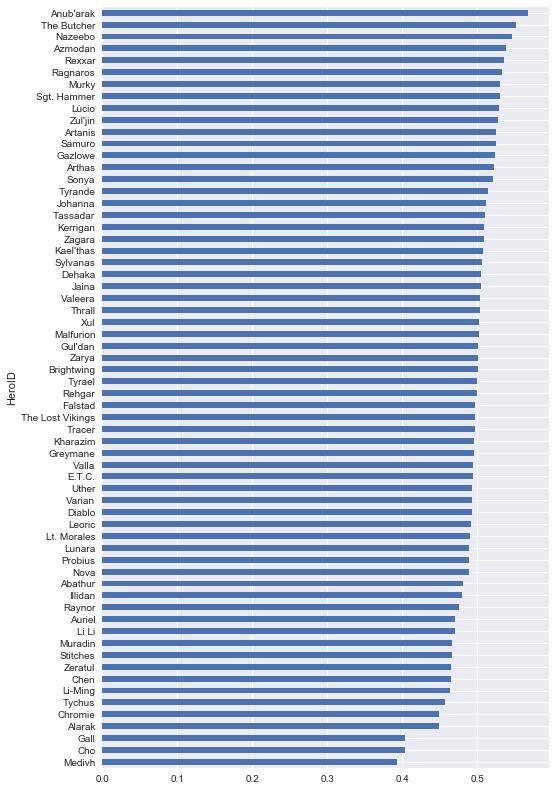

In [51]:
hero_winrate = df.groupby('HeroID')['Is Winner'].mean().sort_values()
hero_winrate.plot.barh(figsize=(8, 14))
_ = plt.yticks(range(len(hero_winrate)), hero_metadata.loc[hero_winrate.index].Name)

In [26]:
metadata.head()

,ID,Name,Group,SubGroup
0,0,Unknown,NaN,NaN
1,1,Abathur,Specialist,Utility
2,2,Anub'arak,Warrior,Tank
3,3,Arthas,Warrior,Bruiser
4,4,Azmodan,Specialist,Siege
